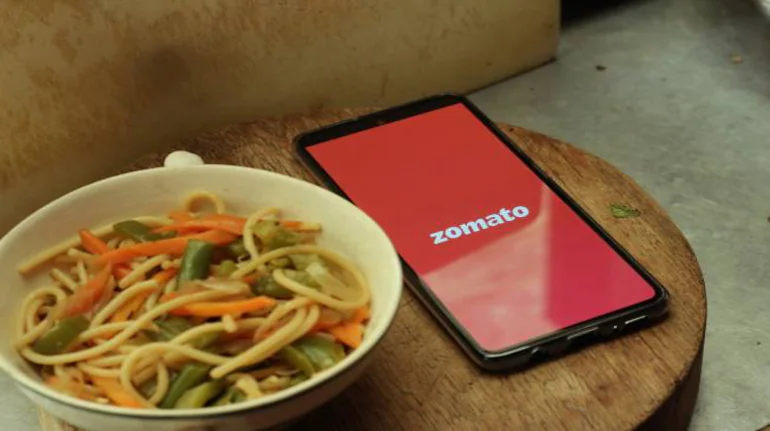

**AN ANALYSIS OF ONLINE FOOD DELIVERY SERVICE : ZOMATO RESTAURANT**
 
 

In [71]:
import pandas as pd #import pandas
from pandas import DataFrame #DataFrame

In [2]:
df=pd.read_csv('/content/drive/MyDrive/zomato.csv',sep=',', encoding='latin-1') #read csv
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
print((df.groupby("Country Code")["Restaurant Name"].count().sort_values(ascending = False))[:5])
print((df.groupby("City")["Restaurant Name"].count().sort_values(ascending = False))[:5])

Country Code
1      8652
216     434
215      80
214      60
189      60
Name: Restaurant Name, dtype: int64
City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: Restaurant Name, dtype: int64


In [4]:
df.groupby('Cuisines')['Aggregate rating'].mean()

Cuisines
Afghani                                      0.725
Afghani, Mughlai, Chinese                    0.000
Afghani, North Indian                        0.000
Afghani, North Indian, Pakistani, Arabian    0.000
African                                      4.700
                                             ...  
Western, Asian, Cafe                         4.200
Western, Fusion, Fast Food                   3.200
World Cuisine                                4.900
World Cuisine, Mexican, Italian              4.400
World Cuisine, Patisserie, Cafe              4.200
Name: Aggregate rating, Length: 1825, dtype: float64

EDA

In [11]:
df.shape

(9551, 21)

In [12]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [14]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

VISUALIZATION

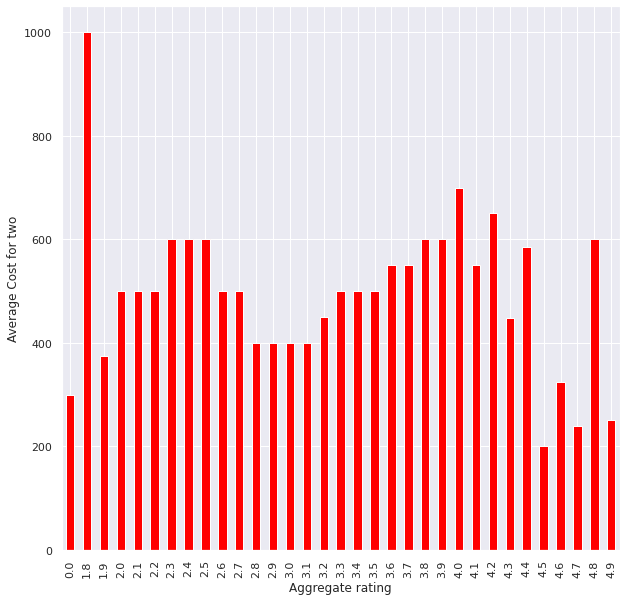

<Figure size 720x576 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)}); 
df.groupby('Aggregate rating')['Average Cost for two'].median().plot(kind='bar', figsize=(10,10), color='red')
plt.xlabel('Aggregate rating')
plt.ylabel('Average Cost for two')
plt.figure();

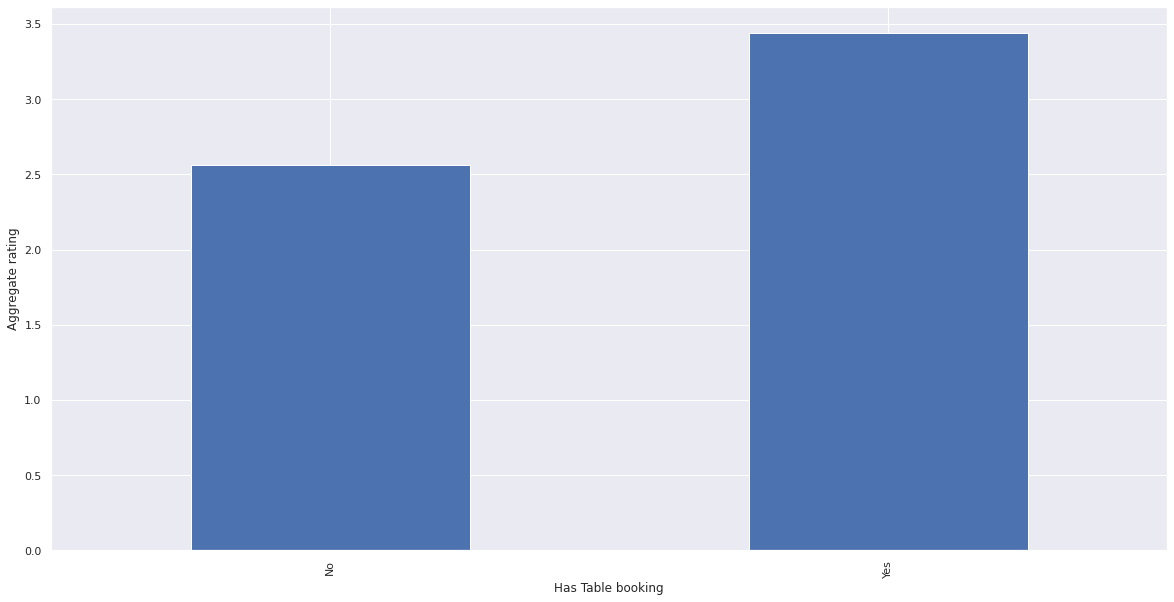

In [17]:
df.groupby('Has Table booking')['Aggregate rating'].mean().plot(kind='bar', figsize=(20,10))
plt.ylabel('Aggregate rating') 
plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence 

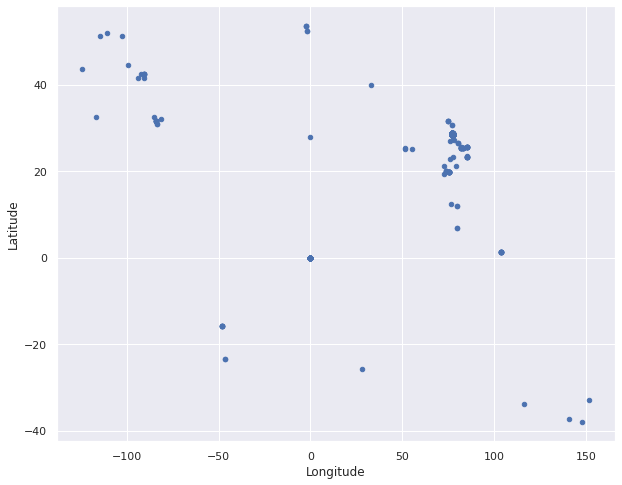

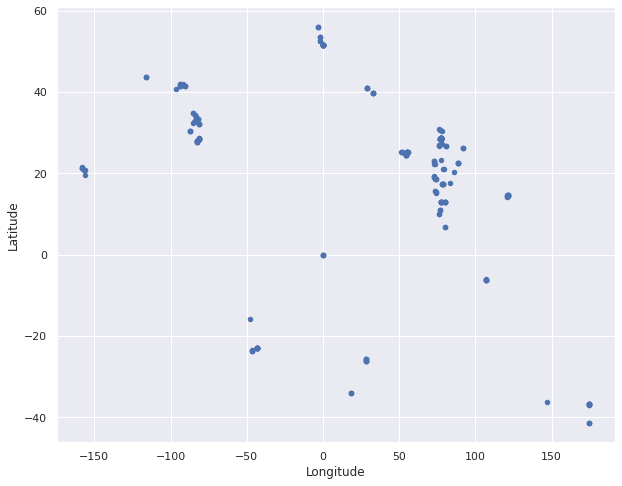

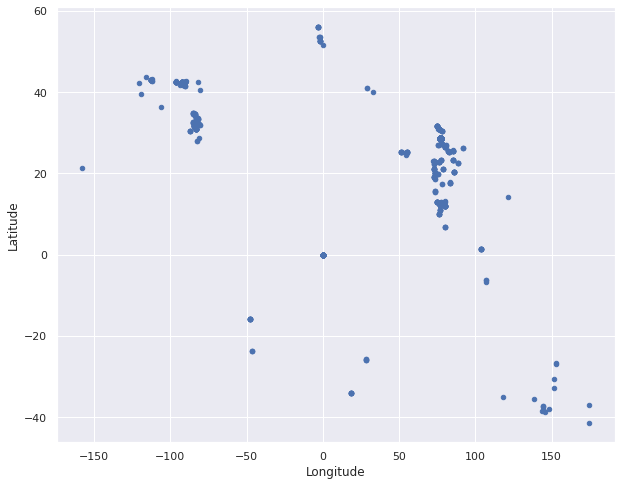

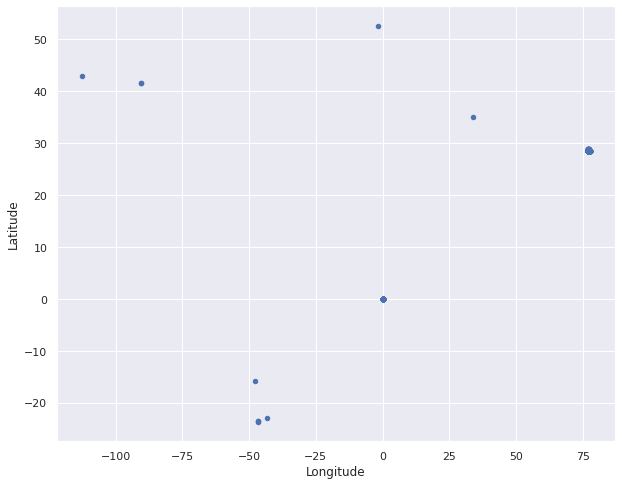

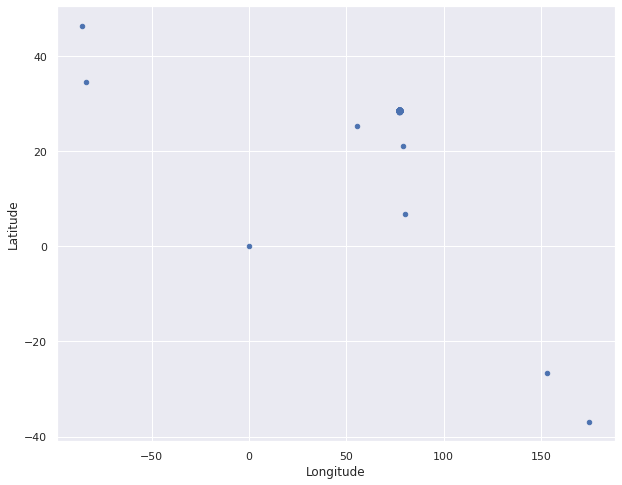

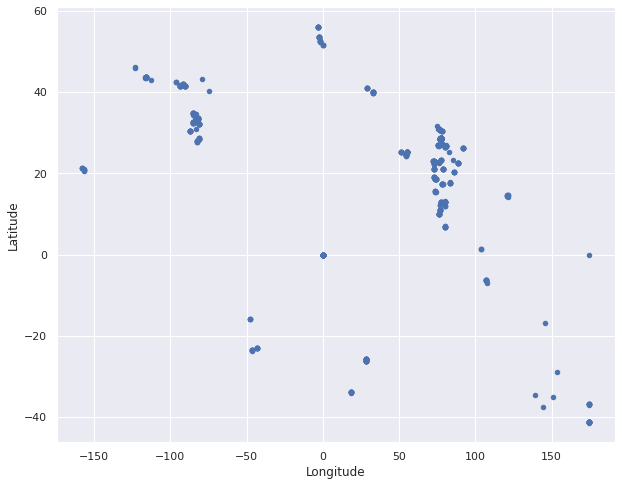

In [18]:
df.groupby('Rating text')['Longitude', 'Latitude'].plot(kind='scatter',x='Longitude',y='Latitude')
plt.ylabel('Latitude') 
plt.show();

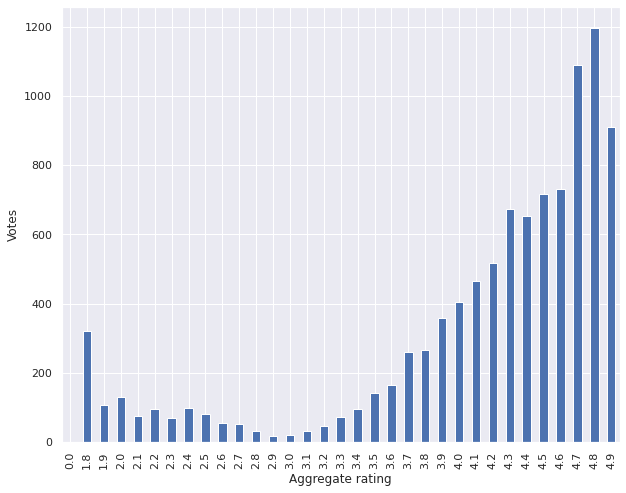

In [19]:
df.groupby('Aggregate rating')['Votes'].mean().plot(kind='bar') 
plt.ylabel('Votes') 
plt.show();

In [20]:
#understanding the rating
ratings = df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


The above information helps us to understand the relation between 'Aggregate rating', 'color' and 'text'. We conclude the following color assigned to the ratings:
Rating 0 - White - Not rated

Rating 1.8 to 2.4 - Red - Poor

Rating 2.5 to 3.4 - Orange - Average

Rating 3.5 to 3.9 - Yellow - Good

Rating 4.0 to 4.4 - Green - Very Good

Rating 4.5 to 4.9 - Dark Green - Excellent

In [22]:
#understanding currency
country_currency = df[['Country Code','Currency']].groupby(['Country Code','Currency']).size().reset_index(name='count').drop('count', axis=1, inplace=False)
country_currency

,Country Code,Currency
0,1,Indian Rupees(Rs.)
1,14,Dollar($)
2,30,Brazilian Real(R$)
3,37,Dollar($)
4,94,Indonesian Rupiah(IDR)
5,148,NewZealand($)
6,162,Botswana Pula(P)
7,166,Qatari Rial(QR)
8,184,Dollar($)
9,189,Rand(R)


whether online delivery available or not?


In [23]:
import plotly.express as px
from plotly.offline import init_notebook_mode, plot, iplot
fig = px.pie(df, names="Has Online delivery", title='Whether online delivery available or not?')
fig.show()

In [25]:
country_online_delivery = df[["Has Online delivery", 'Country Code']].groupby(["Has Online delivery", 'Country Code']).size().reset_index(name='count')
country_online_delivery

,Has Online delivery,Country Code,count
0,No,1,6229
1,No,14,24
2,No,30,60
3,No,37,4
4,No,94,21
5,No,148,40
6,No,162,22
7,No,166,20
8,No,184,20
9,No,189,60


In [26]:
#Highest number of resturants under zomato sevies which also have online booking facility
zomato_locality_booking = df[['Has Table booking', "Locality"]].groupby([ 'Has Table booking',"Locality"]).size().reset_index(name='count').sort_values(by=['count'], ascending=False)
zomato_locality_booking

,Has Table booking,Locality,count
872,No,Shahdara,87
709,No,Pitampura,82
581,No,Mayur Vihar Phase 1,80
490,No,Krishna Nagar,76
744,No,Rajinder Nagar,76
...,...,...,...
640,No,Newmarket,1
641,No,"Nicolway Shopping Centre, Bryanston",1
642,No,"Ninex City Mart Mall, Sohna Road",1
645,No,"North Bridge Road, Rochor",1


Objective1 :

To evaluate the Highest Rated and Lowest Rated Restaurant of the City in all the countries. 

In [6]:
max_rate=df.sort_values('Aggregate rating', ascending=False).groupby(by=['Country Code','City'],as_index=False).first() #find the highest restuarant in the city 
min_rate=df.sort_values('Aggregate rating', ascending=False).groupby(by=['Country Code','City'],as_index=False).last() #find the lowest restuarant in the city 
df_max=max_rate[['Country Code','City','Restaurant Name','Aggregate rating']] #new dataframe created for low rated restaurants
df_min=min_rate[['Country Code','City','Restaurant Name','Aggregate rating']]#new dataframe created for high rated restaurants

In [7]:
max_rate

,Country Code,City,Restaurant ID,Restaurant Name,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,Agra,3400346,Sheroes Hangout,"Opposite The Gateway Hotel, Fatehabad Road, Ta...",Tajganj,"Tajganj, Agra",78.040165,27.161850,"Cafe, North Indian, Chinese",0,Indian Rupees(Rs.),No,No,No,No,1,4.9,Dark Green,Excellent,77
1,1,Ahmedabad,18385201,Cryo Lab,"Ground Floor, Arjun Avenue, Opposite Samarthes...",Ellis Bridge,"Ellis Bridge, Ahmedabad",72.559984,23.028748,"Desserts, Ice Cream",350,Indian Rupees(Rs.),No,No,No,No,2,4.6,Dark Green,Excellent,166
2,1,Allahabad,2400052,Eat On,"Palace Compound, Near Palace Cinema, MG Marg, ...",Civil Lines,"Civil Lines, Allahabad",81.834236,25.450377,North Indian,200,Indian Rupees(Rs.),No,No,No,No,1,3.7,Yellow,Good,105
3,1,Amritsar,2200175,Gurdas Ram Jalebi Wala,"Near Golden Temple, Town Hall, Amritsar",Town Hall,"Town Hall, Amritsar",0.000000,0.000000,Mithai,100,Indian Rupees(Rs.),No,No,No,No,1,4.1,Green,Very Good,104
4,1,Aurangabad,2500030,Bhoj Restaurant,"First Floor, Bhau Pathak Smriti Kamgar Bhavan,...",Nirala Bazar,"Nirala Bazar, Aurangabad",75.317475,19.878028,North Indian,450,Indian Rupees(Rs.),No,No,No,No,2,3.7,Yellow,Good,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,216,Valdosta,17678218,Smok'n Pig B-B-Q,"4228 N Valdosta Rd, Valdosta, GA 31602",Valdosta,"Valdosta, Valdosta",-83.332796,30.897087,BBQ,25,Dollar($),No,No,No,No,2,4.1,Green,Very Good,575
137,216,Vernonia,17558738,Blue House Cafe,"919 Bridge St, Vernonia, OR 97064",Vernonia,"Vernonia, Vernonia",-123.195437,45.858667,"Coffee and Tea, Mediterranean",10,Dollar($),No,No,No,No,1,4.3,Green,Very Good,88
138,216,Waterloo,17697332,Tokyo Japanese Steak House,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,"Japanese, Steak, Sushi",25,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
139,216,Weirton,17694056,Theo Yianni's Authentic Greek Restaurant,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,"Burger, Greek, Sandwich",25,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


In [8]:
min_rate

,Country Code,City,Restaurant ID,Restaurant Name,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,Agra,3400033,The Charcoal Chimney,"Hotel Samovar, Fatehabad Road, Tajganj, Agra",Tajganj,"Tajganj, Agra",78.042990,27.159795,"North Indian, Chinese, Continental, Mughlai",1100,Indian Rupees(Rs.),No,No,No,No,3,3.4,Orange,Average,70
1,1,Ahmedabad,110436,MoMo Cafí© - Courtyard By Marriott,"Courtyard By Marriott, Ramdevnagar Cross Road,...","Courtyard By Marriott, Satellite","Courtyard By Marriott, Satellite, Ahmedabad",72.511581,23.027929,"North Indian, South Indian, Asian, Continental",1400,Indian Rupees(Rs.),No,No,No,No,3,3.6,Yellow,Good,375
2,1,Allahabad,2400019,Bikanerwala,"2A, JMD Bhawan, Strachey Road, Civil Lines, Al...",Civil Lines,"Civil Lines, Allahabad",81.832616,25.451517,"North Indian, Street Food, Fast Food",500,Indian Rupees(Rs.),No,No,No,No,3,3.2,Orange,Average,51
3,1,Amritsar,2200030,Crystal Restaurant,"Crystal Chowk, Queens Road, INA Colony, Amritsar",INA Colony,"INA Colony, Amritsar",74.875878,31.635658,"North Indian, Mughlai",800,Indian Rupees(Rs.),No,No,No,No,3,3.4,Orange,Average,122
4,1,Aurangabad,2500134,Domino's Pizza,"8, Upper Ground Floor, City Pride Commercial C...",CIDCO,"CIDCO, Aurangabad",75.340775,19.876106,Pizza,700,Indian Rupees(Rs.),No,No,No,No,2,3.1,Orange,Average,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,216,Valdosta,17678043,El Toreo Mexican Restaurant,"1713 Gornto Rd, Valdosta, GA 31601",Valdosta,"Valdosta, Valdosta",-83.324700,30.842600,Mexican,25,Dollar($),No,No,No,No,2,3.1,Orange,Average,83
137,216,Vernonia,17558738,Blue House Cafe,"919 Bridge St, Vernonia, OR 97064",Vernonia,"Vernonia, Vernonia",-123.195437,45.858667,"Coffee and Tea, Mediterranean",10,Dollar($),No,No,No,No,1,4.3,Green,Very Good,88
138,216,Waterloo,17697444,Masala Grill & Coffee House,"911 W 23rd St, Cedar Falls, IA 50613",Cedar Falls,"Cedar Falls, Waterloo",-92.456343,42.516908,"Indian, Middle Eastern",10,Dollar($),No,No,No,No,1,3.2,Orange,Average,18
139,216,Weirton,17694056,Theo Yianni's Authentic Greek Restaurant,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,"Burger, Greek, Sandwich",25,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


In [9]:
df_max

,Country Code,City,Restaurant Name,Aggregate rating
0,1,Agra,Sheroes Hangout,4.9
1,1,Ahmedabad,Cryo Lab,4.6
2,1,Allahabad,Eat On,3.7
3,1,Amritsar,Gurdas Ram Jalebi Wala,4.1
4,1,Aurangabad,Bhoj Restaurant,3.7
...,...,...,...,...
136,216,Valdosta,Smok'n Pig B-B-Q,4.1
137,216,Vernonia,Blue House Cafe,4.3
138,216,Waterloo,Tokyo Japanese Steak House,3.9
139,216,Weirton,Theo Yianni's Authentic Greek Restaurant,3.9


In [10]:
df_min

,Country Code,City,Restaurant Name,Aggregate rating
0,1,Agra,The Charcoal Chimney,3.4
1,1,Ahmedabad,MoMo Cafí© - Courtyard By Marriott,3.6
2,1,Allahabad,Bikanerwala,3.2
3,1,Amritsar,Crystal Restaurant,3.4
4,1,Aurangabad,Domino's Pizza,3.1
...,...,...,...,...
136,216,Valdosta,El Toreo Mexican Restaurant,3.1
137,216,Vernonia,Blue House Cafe,4.3
138,216,Waterloo,Masala Grill & Coffee House,3.2
139,216,Weirton,Theo Yianni's Authentic Greek Restaurant,3.9


In [28]:
rating_rest=df_max.merge(df_min,left_on='City',right_on='City',how='inner') #inner join to merge the two dataframe
del rating_rest['Country Code_y']
rating_rest.columns=['Country Code','City','Highest Rated Restaurant','Rating Max','Lowest Rated Restaurant','Rating Min']# renaming the columns 
rating_rest_cityi=rating_rest[rating_rest['Country Code']==1] #storing the dataframe only for country 'India'
rating_rest_cityi #In India
city=rating_rest_cityi['City'].tolist()#converting the series to list 
rate_max=rating_rest_cityi['Rating Max'].tolist()#converting the series to list
rate_min=rating_rest_cityi['Rating Min'].tolist()#converting the series to list
rest_name_high=rating_rest_cityi['Highest Rated Restaurant'].tolist()#converting the series to list
rest_name_low=rating_rest_cityi['Lowest Rated Restaurant'].tolist()#converting the series to list


In [30]:
rating_rest_cityu=rating_rest[rating_rest['Country Code']==216] #U.S.A
rating_rest_cityu #In India
cityu=rating_rest_cityu['City'].tolist()#converting the series to list
rate_maxu=rating_rest_cityu['Rating Max'].tolist()#converting the series to list
rate_minu=rating_rest_cityu['Rating Min'].tolist()#converting the series to list
rest_name_highu=rating_rest_cityu['Highest Rated Restaurant'].tolist()#converting the series to list
rest_name_lowu=rating_rest_cityu['Lowest Rated Restaurant'].tolist()#converting the series to list
rating_rest_cityu

,Country Code,City,Highest Rated Restaurant,Rating Max,Lowest Rated Restaurant,Rating Min
106,216,Albany,Jimmie's Hot Dogs,3.9,BJ's Country Buffet,3.3
107,216,Athens,Sr. Sol 1,4.6,The Grill,3.7
108,216,Augusta,Rae's Coastal Cafe,4.9,Sconyers Bar B Que,3.5
109,216,Boise,Flatbread Neapolitan Pizzeria,4.6,Chandlers Steakhouse,3.9
110,216,Cedar Rapids/Iowa City,Shorts Burger and Shine,4.9,Bluebird Diner,3.6
111,216,Clatskanie,Berry Patch Restaurant,4.3,Berry Patch Restaurant,4.3
112,216,Cochrane,Sakura Sushi & Grill,3.1,Sakura Sushi & Grill,3.1
113,216,Columbus,Cafe Le Rue @ The Landings,4.6,Uptown Vietnam cuisine,3.3
114,216,Dalton,Oakwood Cafe,4.9,Southern Bliss Bakery,3.7
115,216,Davenport,Tantra Asian Bistro,4.9,Frick's Tap,0.0


Objective 2:

To evaluate the most popular cuisine of the world sold in a country and which locality in that country has most number of outlets selling that cuisine. Graph plotted only for the best cuisine of the country and the location where this cuisine is most popular with the count of of places selling that cuisine

In [33]:
zomato_new = df[df['Cuisines'].notnull()] # filtering out the null values from the data
zomato_new.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [34]:
zomato_new.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,55,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [35]:
 # splitting the column 'Cuisine' into multiple columns 
cuisines = zomato_new['Cuisines'].apply(lambda x: pd.Series(x.split(',')))
cuisines.columns=['Cuisine 1','Cuisine 2','Cuisine 3','Cuisine 4','Cuisine 5','Cuisine 6','Cuisines 7','Cuisine 8']# renaming the columns
cuisines.head()

,Cuisine 1,Cuisine 2,Cuisine 3,Cuisine 4,Cuisine 5,Cuisine 6,Cuisines 7,Cuisine 8
0,French,Japanese,Desserts,NaN,NaN,NaN,NaN,NaN
1,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Seafood,Asian,Filipino,Indian,NaN,NaN,NaN,NaN
3,Japanese,Sushi,NaN,NaN,NaN,NaN,NaN,NaN
4,Japanese,Korean,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
result = pd.concat([df, cuisines], axis=1) #concating the two dataframes 
result.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisine 1,Cuisine 2,Cuisine 3,Cuisine 4,Cuisine 5,Cuisine 6,Cuisines 7,Cuisine 8
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,French,Japanese,Desserts,NaN,NaN,NaN,NaN,NaN
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Seafood,Asian,Filipino,Indian,NaN,NaN,NaN,NaN
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Japanese,Sushi,NaN,NaN,NaN,NaN,NaN,NaN
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Japanese,Korean,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
locality=pd.DataFrame(result[['Locality Verbose','Cuisine 1','Cuisine 2','Cuisine 3','Cuisine 4','Cuisine 5','Cuisine 6','Cuisines 7','Cuisine 8']])
locality_stack=pd.DataFrame(locality.stack()) #stacking the columns 
locality.head()

,Locality Verbose,Cuisine 1,Cuisine 2,Cuisine 3,Cuisine 4,Cuisine 5,Cuisine 6,Cuisines 7,Cuisine 8
0,"Century City Mall, Poblacion, Makati City, Mak...",French,Japanese,Desserts,NaN,NaN,NaN,NaN,NaN
1,"Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",Seafood,Asian,Filipino,Indian,NaN,NaN,NaN,NaN
3,"SM Megamall, Ortigas, Mandaluyong City, Mandal...",Japanese,Sushi,NaN,NaN,NaN,NaN,NaN,NaN
4,"SM Megamall, Ortigas, Mandaluyong City, Mandal...",Japanese,Korean,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
keys = [c for c in locality  if c.startswith('Cuisine')]
a=pd.melt(locality, id_vars='Locality Verbose', value_vars=keys, value_name='Cuisines') #melting the stack into one row
max_rate=pd.DataFrame(a.groupby(by=['Locality Verbose','variable','Cuisines']).size().reset_index()) #find the highest restuarant in the city

del max_rate['variable']
max_rate.columns=['Locality Verbose','Cuisines','Count']
max_rate.head()

,Locality Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"ILD Trade Centre Mall, Sohna Road, Gurgaon",North Indian,1
2,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Beverages,1
3,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Mughlai,1
4,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1


In [47]:
#find the highest restuarant in the city
loc=max_rate.sort_values('Count', ascending=False).groupby(by=['Locality Verbose'],as_index=False).first() 
loc.head()

,Locality Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1
2,"A Hotel, Gurdev Nagar, Ludhiana",Chinese,1
3,"ARSS Mall, Paschim Vihar, New Delhi",North Indian,1
4,"Aaya Nagar, New Delhi",Cuisine Varies,1


popular cuisines in world

In [49]:
rating_res=loc.merge(zomato_new,left_on='Locality Verbose',right_on='Locality Verbose',how='inner') #inner join to merge the two dataframe
df=pd.DataFrame(rating_res[['Country Code','Locality Verbose','Cuisines_x','Count']]) #making a dataframe of rating restaurant

In [51]:
country=rating_res.sort_values('Count', ascending=False).groupby(by=['Country Code'],as_index=False).first()#grouping the data by country code
con=pd.DataFrame(country[['Country Code','Locality','Cuisines_x','Count']])
con.columns=['Country Code','Locality','Cuisines','Number of restaurants in the country']#renaming the columns
con1=con.sort_values('Number of restaurants in the country', ascending=False) #sorting the restaurants on the basis of the number of restaurants in the country
con1[:10]
final_con=con1.drop(con1.index[[7,10]])
final_con

,Country Code,Locality,Cuisines,Number of restaurants in the country
0,1,Connaught Place,North Indian,48
14,216,Dubuque,American,9
5,148,Te Aro,Cafe,5
2,30,Ipanema,Brazilian,3
6,162,Kapitolyo,Filipino,2
8,184,"Marina Centre, Downtown Core",Seafood,2
9,189,Green Point,Grill,2
11,208,Kí_í_í_k Esat,Kebab,2
12,214,Najda,Indian,2
1,14,Victor Harbor,Australian,1


popular cusines in india

In [53]:
rating_res=loc.merge(zomato_new,left_on='Locality Verbose',right_on='Locality Verbose',how='inner') #inner join to merge the two dataframe
rating_res1=rating_res[rating_res['Country Code']==1] #restricting the data to India
rating_resturant=pd.DataFrame(rating_res1[['Locality Verbose','Cuisines_x','Count']])
rating_restaurant=rating_resturant.sort_values('Count', ascending=False).groupby(by=['Cuisines_x'],sort=False,as_index=False).first()#grouping it for cuisines
rating_restaurant.columns=['Cuisines','Locality Verbose','Number of restaurants in the locality']
rating_restaurant1=rating_restaurant[rating_restaurant['Number of restaurants in the locality']>8]
rating_restaurant1

,Cuisines,Locality Verbose,Number of restaurants in the locality
0,North Indian,"Connaught Place, New Delhi",48
1,Cafe,"Satyaniketan, New Delhi",31
2,Chinese,"Chanakyapuri, New Delhi",13
3,Mughlai,"Jama Masjid, New Delhi",12
4,Bakery,"Vasant Vihar, New Delhi",11
5,Chinese,"Majnu ka Tila, New Delhi",10


Objective 3:

To evaluate the value for money restaurants in the U.S.A (value for money refers to the restaurants with highest rating and lowest cost)

In [55]:
zomato=pd.read_csv('/content/drive/MyDrive/zomato.csv',sep=',', encoding='latin-1') #read csv
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [56]:
zomato_new = zomato[zomato['Cuisines'].notnull()] # filtering out the null values from the data
zomato_new

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [57]:
 # splitting the column 'Cuisine' into multiple columns 
cuisines = zomato_new['Cuisines'].apply(lambda x: pd.Series(x.split(',')))
cuisines.columns=['Cuisine 1','Cuisine 2','Cuisine 3','Cuisine 4','Cuisine 5','Cuisine 6','Cuisines 7','Cuisine 8']# renaming the columns
cuisines.head()

,Cuisine 1,Cuisine 2,Cuisine 3,Cuisine 4,Cuisine 5,Cuisine 6,Cuisines 7,Cuisine 8
0,French,Japanese,Desserts,NaN,NaN,NaN,NaN,NaN
1,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Seafood,Asian,Filipino,Indian,NaN,NaN,NaN,NaN
3,Japanese,Sushi,NaN,NaN,NaN,NaN,NaN,NaN
4,Japanese,Korean,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
result = pd.concat([zomato, cuisines], axis=1) #concating the two dataframes 
result.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisine 1,Cuisine 2,Cuisine 3,Cuisine 4,Cuisine 5,Cuisine 6,Cuisines 7,Cuisine 8
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,French,Japanese,Desserts,NaN,NaN,NaN,NaN,NaN
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Seafood,Asian,Filipino,Indian,NaN,NaN,NaN,NaN
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Japanese,Sushi,NaN,NaN,NaN,NaN,NaN,NaN
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Japanese,Korean,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
locality=pd.DataFrame(result[['Locality Verbose','Cuisine 1','Cuisine 2','Cuisine 3','Cuisine 4','Cuisine 5','Cuisine 6','Cuisines 7','Cuisine 8']])
locality_stack=pd.DataFrame(locality.stack()) #stacking the columns 
locality.head()

,Locality Verbose,Cuisine 1,Cuisine 2,Cuisine 3,Cuisine 4,Cuisine 5,Cuisine 6,Cuisines 7,Cuisine 8
0,"Century City Mall, Poblacion, Makati City, Mak...",French,Japanese,Desserts,NaN,NaN,NaN,NaN,NaN
1,"Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",Seafood,Asian,Filipino,Indian,NaN,NaN,NaN,NaN
3,"SM Megamall, Ortigas, Mandaluyong City, Mandal...",Japanese,Sushi,NaN,NaN,NaN,NaN,NaN,NaN
4,"SM Megamall, Ortigas, Mandaluyong City, Mandal...",Japanese,Korean,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
keys = [c for c in locality  if c.startswith('Cuisine')]
a=pd.melt(locality, id_vars='Locality Verbose', value_vars=keys, value_name='Cuisines') #melting the stack into one row
max_rate=pd.DataFrame(a.groupby(by=['Locality Verbose','variable','Cuisines']).size().reset_index()) #find the highest restuarant in the city

del max_rate['variable']
max_rate.columns=['Locality Verbose','Cuisines','Count']
max_rate.head()

,Locality Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"ILD Trade Centre Mall, Sohna Road, Gurgaon",North Indian,1
2,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Beverages,1
3,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Mughlai,1
4,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1


In [62]:
loc=max_rate.sort_values('Count', ascending=False).groupby(by=['Locality Verbose'],as_index=False).first() #find the highest restuarant in the city
loc.head()

,Locality Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1
2,"A Hotel, Gurdev Nagar, Ludhiana",Chinese,1
3,"ARSS Mall, Paschim Vihar, New Delhi",North Indian,1
4,"Aaya Nagar, New Delhi",Cuisine Varies,1


In [63]:
rating_resUS=loc.merge(zomato,left_on='Locality Verbose',right_on='Locality Verbose',how='inner') #inner join to merge the two dataframe
rating_resUS=rating_resUS[rating_resUS['Country Code']==216]
rating_resturantUS=pd.DataFrame(rating_resUS[['Country Code','City','Locality Verbose','Cuisines_x','Count','Latitude','Longitude','Aggregate rating','Average Cost for two','Restaurant Name']])
rating_restaurantUS=rating_resturantUS.sort_values('Average Cost for two', ascending=True).groupby(by=['City','Cuisines_x','Locality Verbose'],sort=False,as_index=False).first()
rating_restaurantUS.columns=['City','Cuisine','Locality Verbose','Country Code','Count','Latitude','Longitude','Aggregate rating','Average Cost for two','Restaurant Name']
rating_restaurantUS=rating_restaurantUS[rating_restaurantUS['Aggregate rating']>=4.5]
rating_restaurantUS= rating_restaurantUS[rating_restaurantUS["Average Cost for two"]>0]
rating_restaurantUS=rating_restaurantUS[rating_restaurantUS['Average Cost for two']<40]
ratres=rating_restaurantUS[5:12]
ratres

,City,Cuisine,Locality Verbose,Country Code,Count,Latitude,Longitude,Aggregate rating,Average Cost for two,Restaurant Name
29,Pensacola,Greek,"Perdido Key, Pensacola",216,1,30.319982,-87.421896,4.7,10,Original Georgios Authentic Greek Food
47,Cedar Rapids/Iowa City,American,"Iowa City, Cedar Rapids/Iowa City",216,3,41.663849,-91.531414,4.5,10,The Hamburg Inn No. 2 Inc.
54,Cedar Rapids/Iowa City,Pizza,"Marion, Cedar Rapids/Iowa City",216,1,42.033100,-91.599500,4.7,25,Zoeys Pizzeria
56,Rest of Hawaii,Seafood,"Kahuku, Rest of Hawaii",216,1,21.677078,-157.948486,4.5,25,Giovanni's Shrimp Truck
57,Lincoln,Thai,"Haymarket, Lincoln",216,1,40.814300,-96.707200,4.5,25,Blue Orchid Thai Restaurant
62,Orlando,Vegetarian,"Winter Park, Orlando",216,1,28.601088,-81.322631,4.7,25,Tibby's New Orleans Kitchen
64,Orlando,Tea,"The Milk District, Orlando",216,1,28.543571,-81.351467,4.9,25,Pom Pom's Teahouse and Sandwicheria


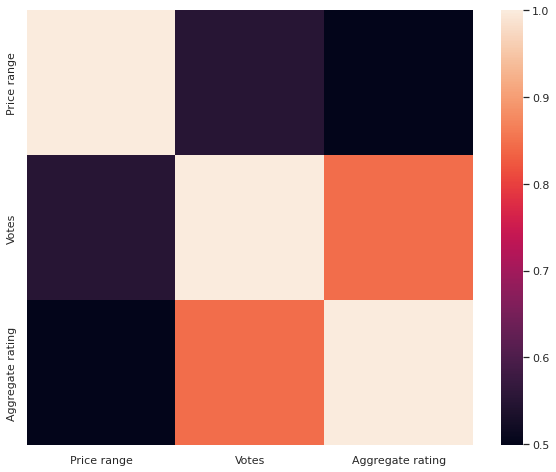

In [67]:
numeric = ['Price range', 'Votes', 'Aggregate rating']
sns.heatmap(zomato[numeric].corr(method='spearman'));

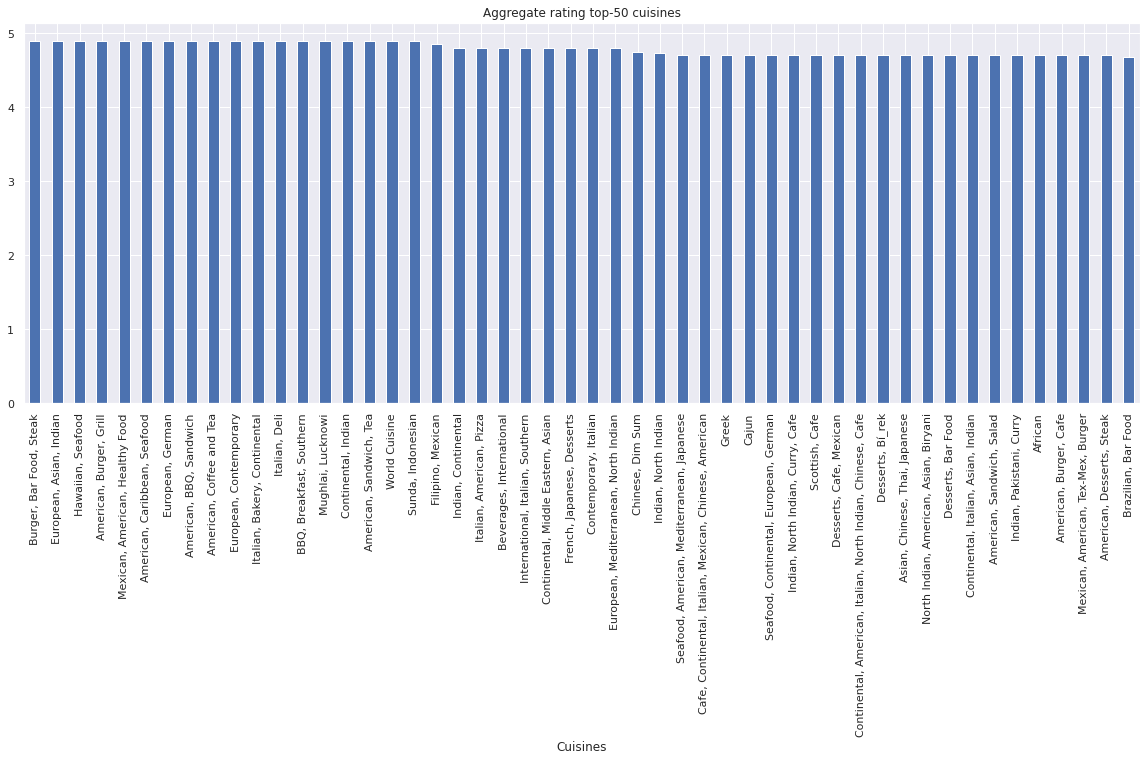

In [68]:
zomato.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(50).plot(kind='bar',figsize=(20,7),title='Aggregate rating top-50 cuisines')

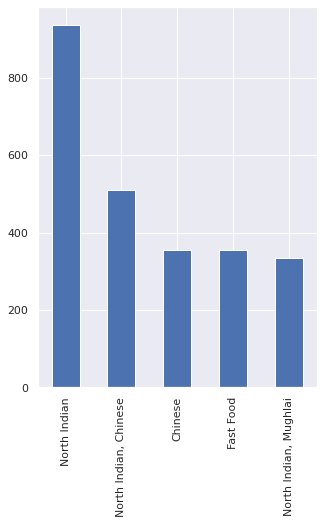

In [69]:
zomato['Cuisines'].value_counts().head(5).plot(kind='bar', figsize = (5,7))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



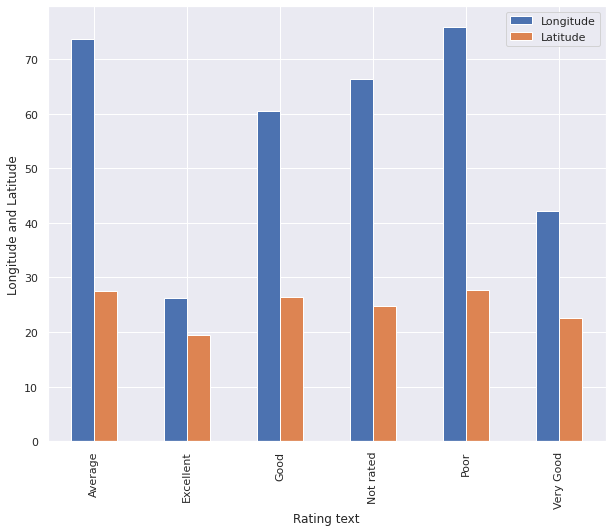

In [70]:
zomato.groupby('Rating text')['Longitude', 'Latitude'].mean().plot(kind='bar')
plt.ylabel('Longitude and Latitude') 
plt.show();

ANALYSIS OF MISSING DATA

In [72]:
import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

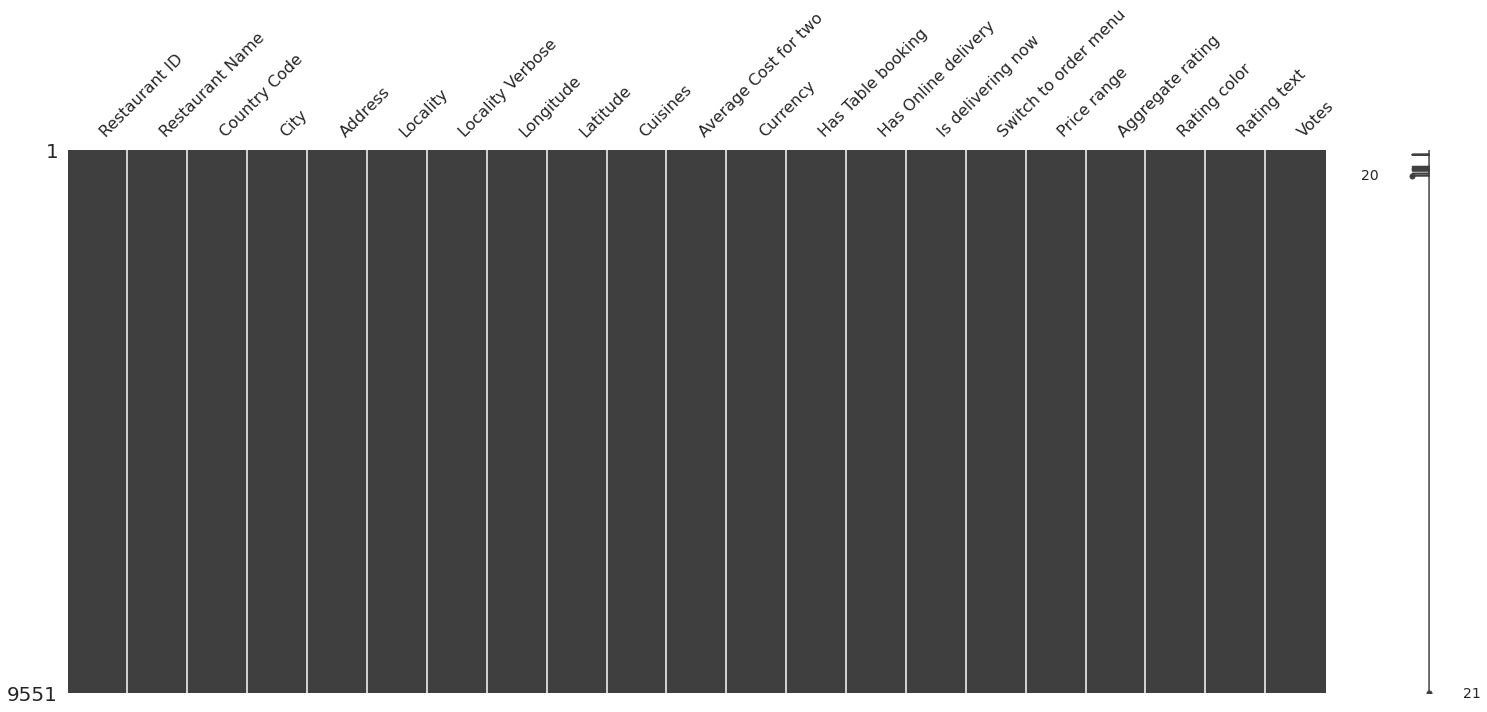

In [73]:
# Visualize missing values as a matrix
msno.matrix(zomato)

no missing data

In [74]:
for i in zomato.columns:
    null_rate = zomato[i].isnull().sum() / len(zomato)*100
    if null_rate > 0 :
        print( "{}'s null rate: {}%".format(i, round(null_rate, 2)))

Cuisines's null rate: 0.09%


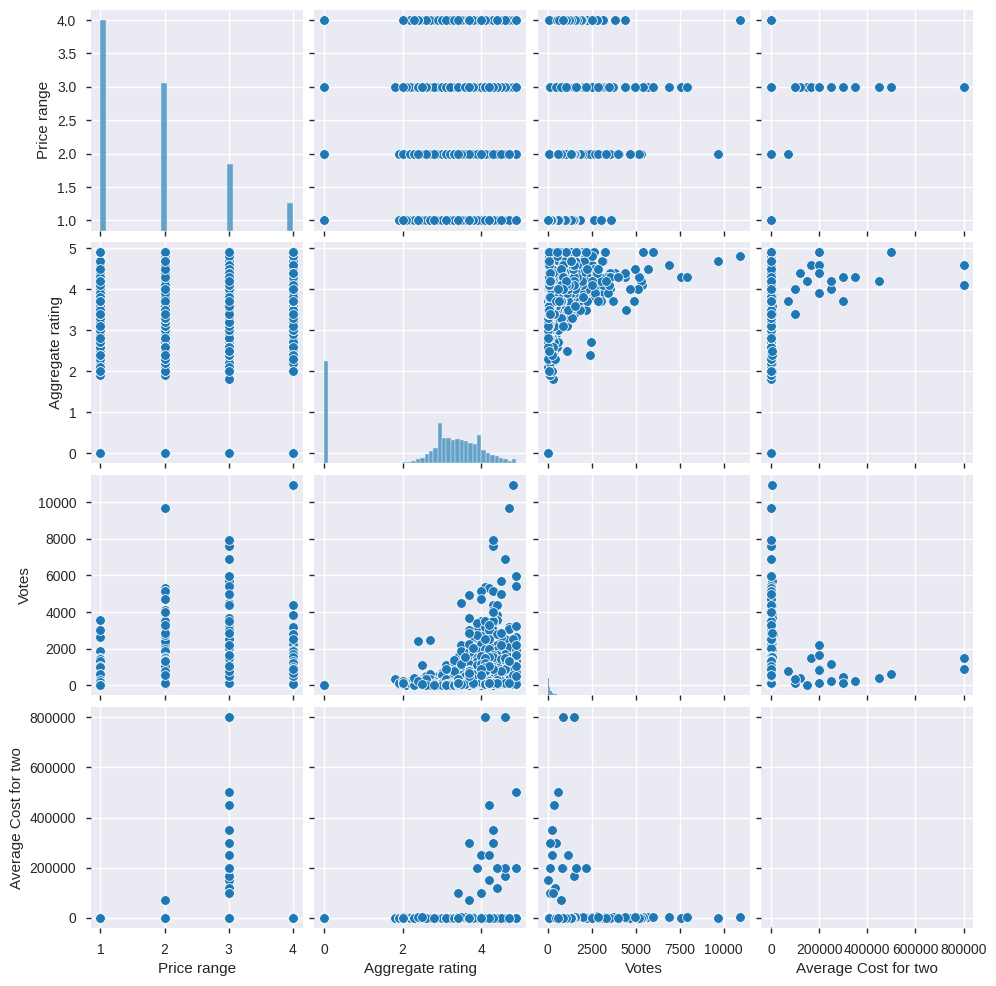

In [80]:
n = ['Price range', 'Aggregate rating', 'Votes', 'Average Cost for two']
sns.pairplot(zomato[n])

APPLYING KNN

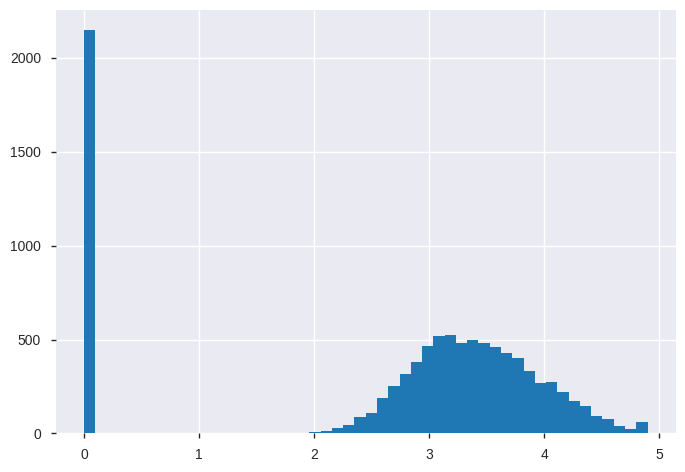

In [81]:
zomato["Aggregate rating"].hist(bins = 50)

In [82]:
zomato.drop(zomato[(zomato["Votes"]<2)].index, inplace=True)

In [83]:
zomato = zomato.dropna()
zomato = zomato.drop(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Rating color', 
       'Rating text', 'Is delivering now', 'Switch to order menu'], axis=1)
new_values = {'No':0, "Yes":1} 
zomato['Has Online delivery'] = zomato['Has Online delivery'].map(new_values)
zomato['Has Table booking'] = zomato['Has Table booking'].map(new_values)
zomato = pd.get_dummies(zomato, columns=["Price range"])

In [84]:
#splitting of data
from sklearn.model_selection import train_test_split

X = zomato.drop("Aggregate rating", axis=1) 
y = zomato["Aggregate rating"] 

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=12)
print(y_train)

4456    0.0
4731    2.1
6022    3.2
3060    3.8
2285    4.4
       ... 
8946    2.9
3742    3.5
1529    3.3
6855    2.8
7074    3.8
Name: Aggregate rating, Length: 5973, dtype: float64


In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score

In [88]:
knn = KNeighborsRegressor(n_neighbors=5, algorithm = "brute")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
print('Mean squared error:', mean_squared_error(y_valid, y_pred))
print('Explained variance score:', explained_variance_score(y_valid, y_pred))

Mean squared error: 0.23311224899598393
Explained variance score: 0.8050694822808895


In [89]:
#apply k fold , cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=12) 
knn = KNeighborsRegressor(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=kf, scoring='explained_variance')
print('scores:', scores)
print('cross validation :', np.mean(scores))

scores: [0.79934106 0.81265281 0.78389441 0.82238789 0.76737209]
cross validation : 0.7971296533830521


APPLYING DECISION TREE

In [91]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3, random_state=2021)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=2021)

In [93]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', feature_names=X.columns)
print(open('tree.dot').read()) 

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Votes <= 3.5\nsquared_error = 1.028\nsamples = 5973\nvalue = 3.2"] ;
1 [label="squared_error = 0.0\nsamples = 405\nvalue = 0.0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Votes <= 122.5\nsquared_error = 0.304\nsamples = 5568\nvalue = 3.433"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="Votes <= 20.5\nsquared_error = 0.192\nsamples = 3723\nvalue = 3.216"] ;
2 -> 3 ;
4 [label="squared_error = 0.068\nsamples = 1492\nvalue = 3.027"] ;
3 -> 4 ;
5 [label="squared_error = 0.235\nsamples = 2231\nvalue = 3.341"] ;
3 -> 5 ;
6 [label="Longitude <= 77.003\nsquared_error = 0.241\nsamples = 1845\nvalue = 3.873"] ;
2 -> 6 ;
7 [label="squared_error = 0.127\nsamples = 579\nvalue = 4.153"] ;
6 -> 7 ;
8 [label="squared_error = 0.24\nsamples = 1266\nvalue = 3.744"] ;
6 -> 8 ;
}


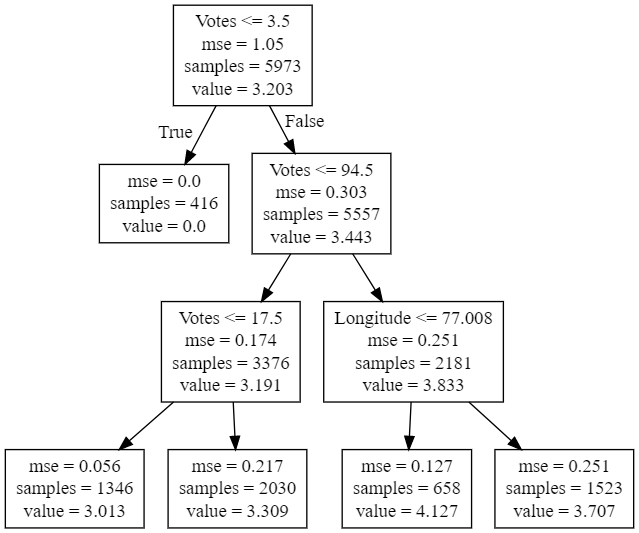

In [95]:
from sklearn.metrics import explained_variance_score
y_pred = tree.predict(X_valid)
explained_variance_score(y_valid, y_pred)

0.863745716395073

In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from math import ceil
kf = KFold(n_splits=5, shuffle=True, random_state=2021)
tree = DecisionTreeRegressor(max_depth=3, random_state=2021)
tree_params={'max_depth': np.arange(5, 10), 
             "min_samples_split": np.arange(2, 5),
             "min_samples_leaf": np.arange(5, 10),
             "max_features": np.arange(ceil(len(X_train.columns)/2), len(X_train.columns))} 
tree_grid = GridSearchCV(tree, tree_params, cv=kf, scoring='explained_variance') 
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=DecisionTreeRegressor(max_depth=3, random_state=2021),
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                         'max_features': array([5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4])},
             scoring='explained_variance')

APPLYING LINEAR REGRESSION

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

In [98]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_valid)

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
print('MSE:', mean_squared_error(y_valid, y_pred))
print('MAE:', mean_absolute_error(y_valid, y_pred))
print('MedAE:', median_absolute_error(y_valid, y_pred))
print('R2:', r2_score(y_valid, y_pred))

MSE: 0.9569738672473812
MAE: 0.6259824752959322
MedAE: 0.39032784874458537
R2: 0.19943139964914525


No handles with labels found to put in legend.


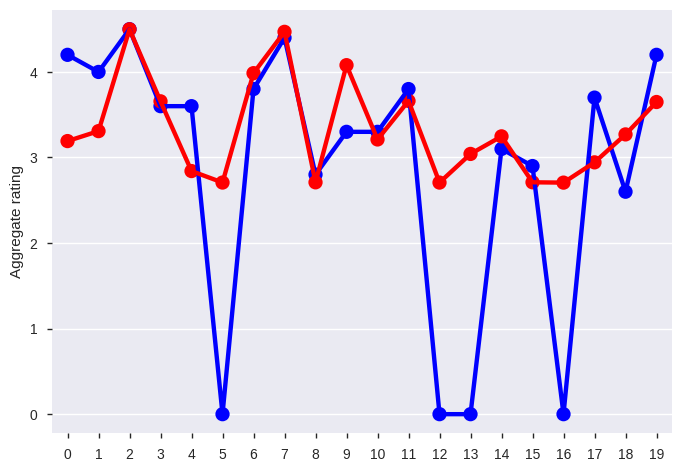

In [100]:
g = sns.pointplot(x=y_valid.index[:20], y=y_valid[:20], color='blue', label='True')
g = sns.pointplot(x=y_valid.index[:20], y=y_pred[:20], color='red', label='Prediction')
g.set_xticklabels(np.arange(20))
plt.legend()
plt.show()